https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/calculate-tweet-word-frequencies-in-python/

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [2]:
consumer_key= 'FCiELOid3JEEWi08wPK1mUY24'
consumer_secret= 'qJQUXPDRghGlPwUBJqG1wVXdnYLEsLIpqgT5Fn57f8nWGntMIT'
access_token= '2470096603-cyZwN87zn3TWVZgpAtSMmhXEieRcTk78Uu5fnQA'
access_token_secret= '2u8ygy5Wn5Qa4YPzVDJFdXgaVfzqOF6bJvBvLRwMOyITj'

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
print(api)

In [6]:
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]


['As Carney put it in 2015, as a result of climate change, “the tail risks of today” will be “the catastrophic norms… https://t.co/ZLO5hfaXKf',
 'Just explained #BBC World Service how #climate change is making #mountaineering riskier. The interview was based on… https://t.co/JU5SUf97xr',
 '#ICYMI: To get the most out of #RenewableEnergy, building #windturbines in the Upper Midwest and solar in the Mid-A… https://t.co/lJEkBxUIQZ',
 '#ClimateCrisis #psychology\n\nThe Existential Dread of #ClimateChange\nHow despair about our changing #climate may get… https://t.co/nweBazl73x',
 '#CLIMATE Groups Hope Virginia’s Rapidly Rising Sea Levels Will Motivate Young Voters https://t.co/mC9pPWhefx  #GlobalWarming #climatechange']

In [16]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [17]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]


['As Carney put it in 2015 as a result of climate change the tail risks of today will be the catastrophic norms',
 'Just explained BBC World Service how climate change is making mountaineering riskier The interview was based on',
 'ICYMI To get the most out of RenewableEnergy building windturbines in the Upper Midwest and solar in the MidA',
 'ClimateCrisis psychologyThe Existential Dread of ClimateChangeHow despair about our changing climate may get',
 'CLIMATE Groups Hope Virginias Rapidly Rising Sea Levels Will Motivate Young Voters GlobalWarming climatechange']

In [18]:
# Note how capitalization impacts unique returned values
ex_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Get unique elements in the list
set(ex_list)


{',', 'Dog', 'cat', 'dog'}

In [19]:
# Note how capitalization impacts unique returned values
words_list = ["Dog", "dog", "dog", "cat", "cat", ","]

# Make all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case


['dog', 'dog', 'dog', 'cat', 'cat', ',']

In [20]:
# Now you have only unique words
set(lower_case)


{',', 'cat', 'dog'}

In [21]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].split()


['As',
 'Carney',
 'put',
 'it',
 'in',
 '2015',
 'as',
 'a',
 'result',
 'of',
 'climate',
 'change',
 'the',
 'tail',
 'risks',
 'of',
 'today',
 'will',
 'be',
 'the',
 'catastrophic',
 'norms']

In [22]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()


['as',
 'carney',
 'put',
 'it',
 'in',
 '2015',
 'as',
 'a',
 'result',
 'of',
 'climate',
 'change',
 'the',
 'tail',
 'risks',
 'of',
 'today',
 'will',
 'be',
 'the',
 'catastrophic',
 'norms']

In [23]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]


[['as',
  'carney',
  'put',
  'it',
  'in',
  '2015',
  'as',
  'a',
  'result',
  'of',
  'climate',
  'change',
  'the',
  'tail',
  'risks',
  'of',
  'today',
  'will',
  'be',
  'the',
  'catastrophic',
  'norms'],
 ['just',
  'explained',
  'bbc',
  'world',
  'service',
  'how',
  'climate',
  'change',
  'is',
  'making',
  'mountaineering',
  'riskier',
  'the',
  'interview',
  'was',
  'based',
  'on']]

In [24]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)


[('climate', 872),
 ('change', 651),
 ('the', 546),
 ('to', 402),
 ('of', 294),
 ('and', 249),
 ('is', 236),
 ('in', 225),
 ('a', 188),
 ('climatechange', 182),
 ('on', 171),
 ('for', 136),
 ('we', 104),
 ('how', 90),
 ('are', 88)]

In [25]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()


,words,count
0,climate,872
1,change,651
2,the,546
3,to,402
4,of,294


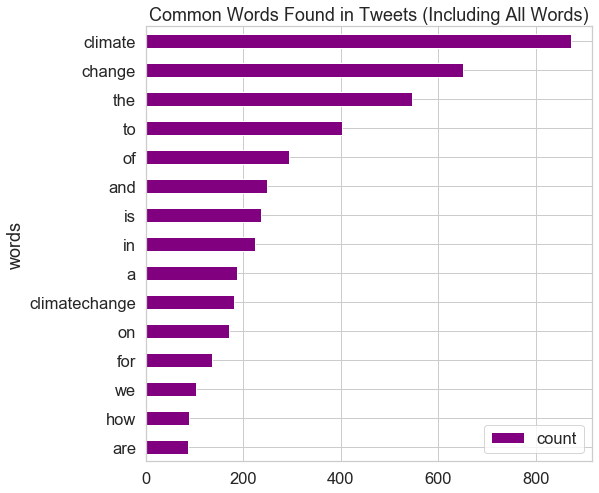

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [27]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emack\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]


['there', 'he', 'above', 'nor', 'so', 'too', 'hasn', 'you', 'off', 'now']

In [29]:
words_in_tweet[0]


['as',
 'carney',
 'put',
 'it',
 'in',
 '2015',
 'as',
 'a',
 'result',
 'of',
 'climate',
 'change',
 'the',
 'tail',
 'risks',
 'of',
 'today',
 'will',
 'be',
 'the',
 'catastrophic',
 'norms']

In [31]:
for all_words in words_in_tweet:
    for a word in all_words:
        # remove stop words

SyntaxError: invalid syntax (<ipython-input-31-842d9659e6cb>, line 2)

In [32]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]


['carney',
 'put',
 '2015',
 'result',
 'climate',
 'change',
 'tail',
 'risks',
 'today',
 'catastrophic',
 'norms']

In [33]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)


[('climate', 872),
 ('change', 651),
 ('climatechange', 182),
 ('new', 63),
 ('amp', 56),
 ('globalwarming', 52),
 ('could', 44),
 ('people', 42),
 ('us', 37),
 ('sea', 36),
 ('california', 34),
 ('un', 32),
 ('world', 30),
 ('may', 30),
 ('environment', 30)]

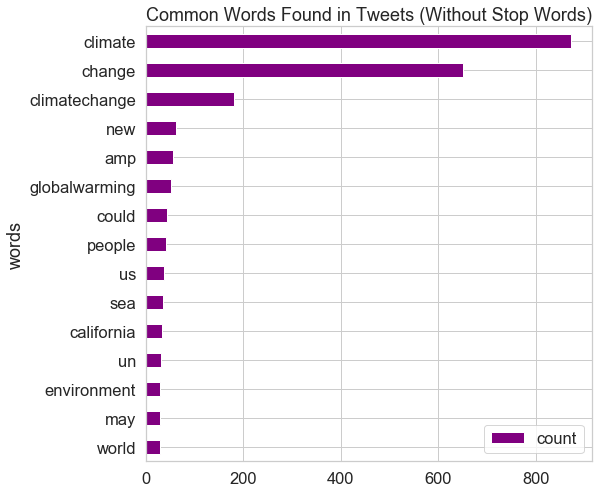

In [34]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()


In [35]:
collection_words = ['climatechange', 'climate', 'change']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]


In [36]:
tweets_nsw[0]


['carney',
 'put',
 '2015',
 'result',
 'climate',
 'change',
 'tail',
 'risks',
 'today',
 'catastrophic',
 'norms']

In [37]:
tweets_nsw_nc[0]


['carney',
 'put',
 '2015',
 'result',
 'tail',
 'risks',
 'today',
 'catastrophic',
 'norms']

In [38]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)


[('new', 63),
 ('amp', 56),
 ('globalwarming', 52),
 ('could', 44),
 ('people', 42),
 ('us', 37),
 ('sea', 36),
 ('california', 34),
 ('un', 32),
 ('world', 30),
 ('may', 30),
 ('environment', 30),
 ('wildfires', 28),
 ('cop25', 27),
 ('need', 27)]

In [39]:
len(counts_nsw_nc)


3544

In [40]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()


,words,count
0,new,63
1,amp,56
2,globalwarming,52
3,could,44
4,people,42


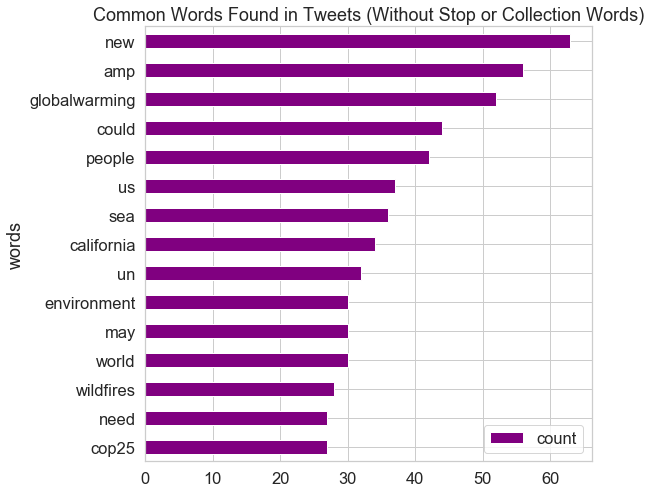

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()
